In [1]:
#Let's do this with pandas now
import math
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

In [2]:
#Import and parse the data into a manipulatable dataset aka df or dataframe
xl = pd.ExcelFile("C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_STX_UVD_30DISC_1Sig_DZ_Data.xlsx")
df = xl.parse("ZrUPb")#, index_col=1) #index_col=0 selects which column to index the rows based on
df.set_index("Sample_ID", inplace = True) #does same thing as index_col=0 above - sets the index column for the df; inplace = True makes it permananet

#Perform any of below functions to see what's in the dataframe
#df.columns #shows column headers
df[:10] #lists first 10 rows

,Grain_ID,Analysis_ID,206Pb_204Pb,U_ppm,U_Th,Th_U,207Pb_206Pb,207Pb_206Pb_err,207Pb_235U,207Pb_235U_err,...,68Age,68Age_err,76Age,76Age_err,BestAge,BestAge_err,Disc,ZHe_Age,ZHe_Age_err,RimCore
Sample_ID,,,,,,,,,,,,,,,,,,,,,
17STX-01,17STX01_1.FIN2,17STX01_1.FIN2,NaN,318.0,2.430,NaN,NaN,NaN,4.4160,0.03500,...,1738.00,10.50,1676,9.5,1676.00,9.50,3.699284,NaN,NaN,NaN
17STX-01,17STX01_2.FIN2,17STX01_2.FIN2,NaN,475.0,1.534,NaN,NaN,NaN,0.0318,0.00080,...,31.09,0.29,100,50.0,31.09,0.29,2.232704,NaN,NaN,NaN
17STX-01,17STX01_3.FIN2,17STX01_3.FIN2,NaN,382.0,2.040,NaN,NaN,NaN,0.1589,0.00215,...,148.10,1.10,190,32.0,148.10,1.10,1.002674,NaN,NaN,NaN
17STX-01,17STX01_4.FIN2,17STX01_4.FIN2,NaN,91.5,1.220,NaN,NaN,NaN,0.8590,0.01050,...,624.80,4.45,625,23.5,624.80,4.45,0.509554,NaN,NaN,NaN
17STX-01,17STX01_5.FIN2,17STX01_5.FIN2,NaN,258.7,0.971,NaN,NaN,NaN,1.7760,0.01300,...,1037.00,5.50,1029,12.5,1029.00,12.50,0.777454,NaN,NaN,NaN
17STX-01,17STX01_6.FIN2,17STX01_6.FIN2,NaN,168.0,0.856,NaN,NaN,NaN,0.0466,0.00225,...,41.30,0.75,240,90.0,41.30,0.75,10.217391,NaN,NaN,NaN
17STX-01,17STX01_7.FIN2,17STX01_7.FIN2,NaN,504.0,1.651,NaN,NaN,NaN,0.2491,0.00290,...,224.60,1.50,234,23.0,224.60,1.50,0.619469,NaN,NaN,NaN
17STX-01,17STX01_8.FIN2,17STX01_8.FIN2,NaN,218.1,1.168,NaN,NaN,NaN,0.1208,0.00215,...,117.60,0.90,91,34.0,117.60,0.90,1.818182,NaN,NaN,NaN
17STX-01,17STX01_9.FIN2,17STX01_9.FIN2,NaN,311.3,0.846,NaN,NaN,NaN,0.2994,0.00445,...,252.30,2.00,367,31.5,252.30,2.00,4.935946,NaN,NaN,NaN


In [9]:
sampleList = ['GRZA149','GRZA160','17STX-17','17STX-18','17UVD-10','17UVD-07','17UVD-06','17UVD-05','17UVD-04','17UVD-03','17UVD-02']

#sampleList = ['17STX-17']

#sampleList = ['17STX-05']

sampleList2 = ['17STX-05']

#sampleList

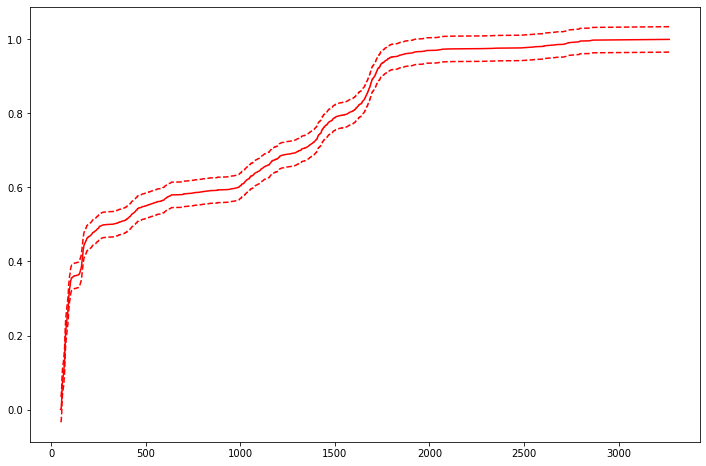

Sample size = 1564
95% Confidence Interval = ± 0.03433009956493918


In [10]:
#creates new dataframe based purely on the samples you want to subsample/downsample
df2 = df.loc[sampleList]
ecdf = ECDF(df2.BestAge)

confidence = 0.95
alpha = 1-confidence
delta = math.sqrt((1/(2*(df2.BestAge.count()+1)))*math.log(2/alpha))
#delta

pyplot.figure(1, figsize=(12,8))

pyplot.plot(ecdf.x, ecdf.y, 'red')
pyplot.plot(ecdf.x, ecdf.y+delta, 'red', linestyle = 'dashed')
pyplot.plot(ecdf.x, ecdf.y-delta, 'red', linestyle = 'dashed')
pyplot.show()

print('Sample size =', df2.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta)

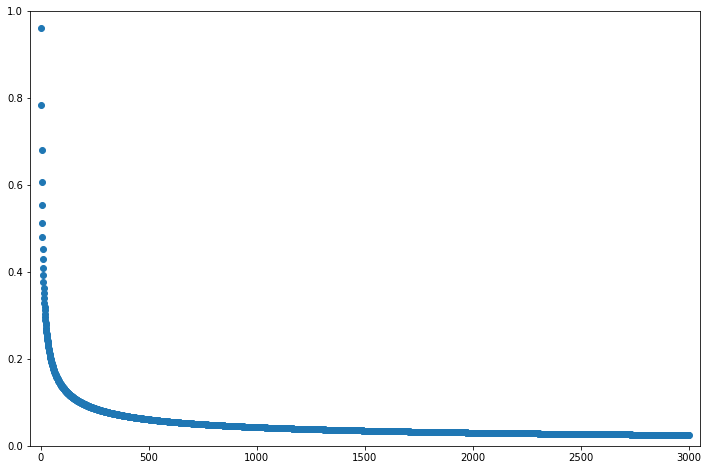

95% confidence interval for n = 300 is 0.07827966999424903


In [8]:
n = 3000
nex = 300
confidence = 0.95
alpha = 1-confidence
deltas = np.zeros(n)
xdiff = np.zeros(n)

for i in range (0, n):
    deltas[i] = math.sqrt((1/(2*(i+1)))*math.log(2/alpha))
    xdiff[i] = i

pyplot.figure(1, figsize=(12,8))
pyplot.plot(xdiff, deltas, marker = 'o', linestyle = '')
pyplot.axis([-50, 3050, 0, 1])
#pyplot.axis([-50, 500, 0, 0.2])
pyplot.show()
print('95% confidence interval for n =', nex, 'is', math.sqrt((1/(2*(nex+1)))*math.log(2/alpha)))

Sample size = 1564
95% Confidence Interval = ± 0.03433009956493918


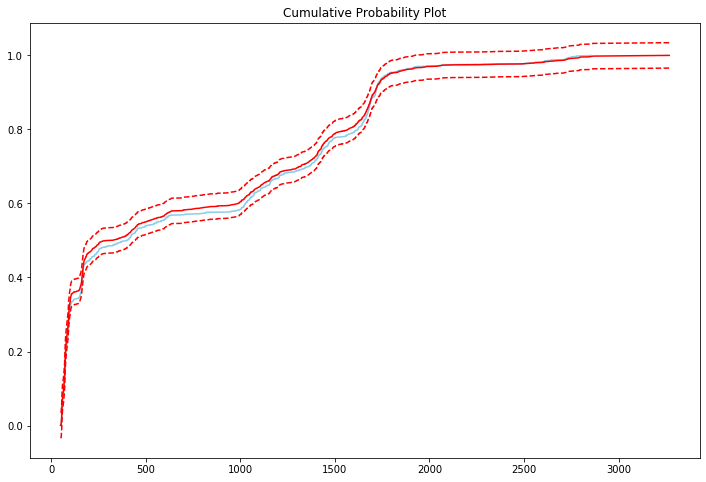

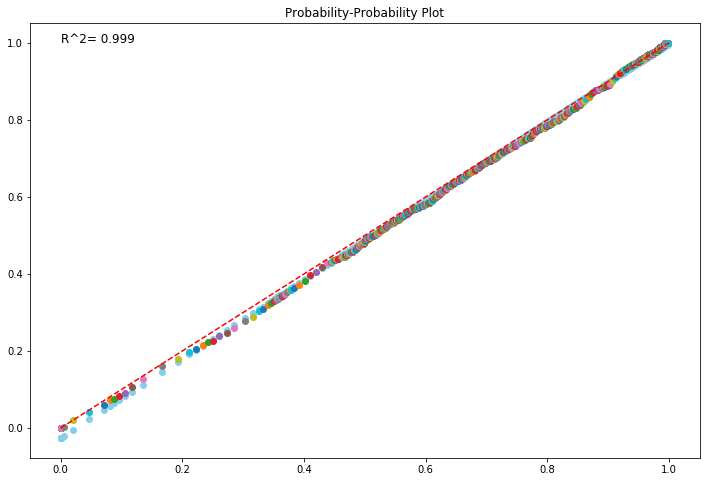

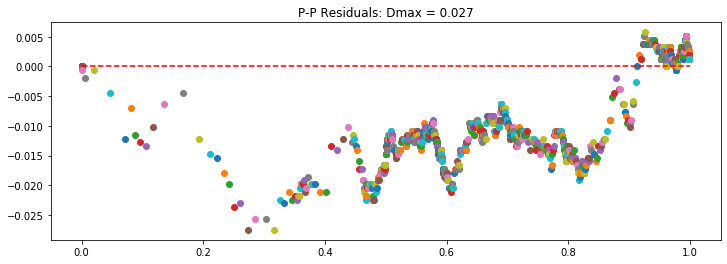

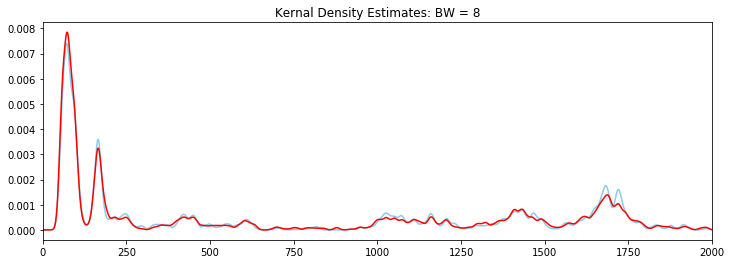

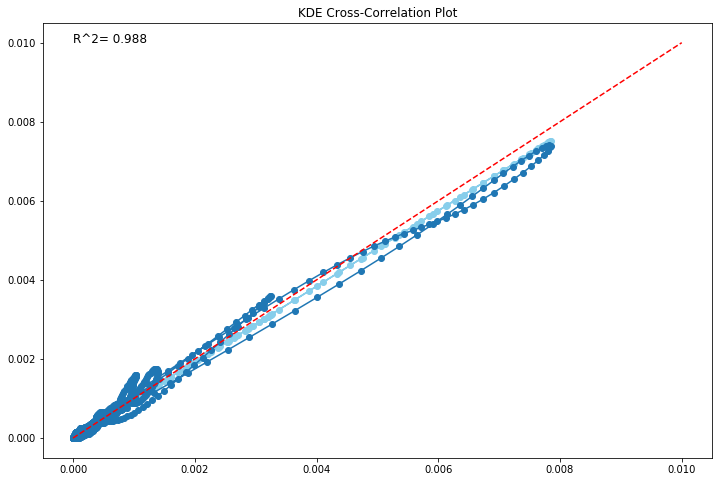

Elapsed Time = 14.199303150177002 seconds


In [11]:
#select a new random sample (subset) from the sample with replacement (replace=True). This best approximates sampling from the population. AKA bootstrapping?
start = time.time()

df2 = df.loc[sampleList]
ecdf = ECDF(df2.BestAge)
ppparent = ecdf([np.linspace(0, 3000, 1500)]) #600)])

KDE_age = np.arange(0, 4501, 1)
bw=8

KDE = np.zeros(shape=(len(df2.BestAge),len(KDE_age)))
kde = KDEUnivariate(df2.BestAge)
kde.fit(bw=bw)
kde = kde.evaluate(KDE_age)

real1 = df2.sample(replace=True, n=df2.BestAge.count())
ecdf1 = ECDF(real1.BestAge)
ppdraw = ecdf1([np.linspace(0, 3000, 1500)]) #600)])
ppresidual = ppdraw-ppparent
Dmax = np.max(np.abs(ppresidual))

KDEreal1 = np.zeros(shape=(len(real1.BestAge),len(KDE_age)))
kdereal1 = KDEUnivariate(real1.BestAge)
kdereal1.fit(bw=bw)
kdereal1 = kdereal1.evaluate(KDE_age)

ppslope, ppintercept, ppr_value, ppp_value, ppstd_err = st.linregress(ppparent,ppdraw)
kde_slope, kde_intercept, kde_r_value, kde_p_value, kde_std_err = st.linregress(kde,kdereal1)

pyplot.figure(1, figsize=(12,8))
pyplot.figure(2, figsize=(12,8))
pyplot.figure(3, figsize=(12,4))
pyplot.figure(4, figsize=(12,4))
pyplot.figure(5, figsize=(12,8))

pyplot.figure(1)
pyplot.plot(ecdf1.x, ecdf1.y, 'skyblue')
pyplot.plot(ecdf.x, ecdf.y, 'red')
pyplot.plot(ecdf.x, ecdf.y+delta, 'red', linestyle = 'dashed')
pyplot.plot(ecdf.x, ecdf.y-delta, 'red', linestyle = 'dashed')
pyplot.title("Cumulative Probability Plot")

pyplot.figure(2)
pyplot.plot(ppparent, ppintercept + ppslope*ppparent, 'skyblue', marker = 'o')
pyplot.plot(ppparent, ppdraw, marker = 'o')
pyplot.plot([0,1],[0,1], 'red', linestyle = 'dashed')
pyplot.text(0, 1, "R^2= %0.3f" % (ppr_value**2), fontsize=12)
pyplot.title("Probability-Probability Plot")

#Residuals are the true values minus the estimated values (in this case simulated values)
pyplot.figure(3)
pyplot.plot(ppparent, ppresidual, marker = 'o')
pyplot.plot([0,1],[0,0], 'red', linestyle = 'dashed')
pyplot.title("P-P Residuals: Dmax = %0.3f" % (Dmax))

pyplot.figure(4)
pyplot.plot(KDE_age, kdereal1, color = 'skyblue')
pyplot.plot(KDE_age, kde, color='red')
pyplot.xlim(0, 2000)
pyplot.title("Kernal Density Estimates: BW = %0.0f" % (bw))

pyplot.figure(5)
pyplot.plot(kde, kde_intercept + kde_slope*kde, 'skyblue', marker = 'o')
pyplot.plot(kde, kdereal1, marker = 'o')
pyplot.plot([0, 0.01],[0, 0.01], 'red', linestyle = 'dashed')
pyplot.text(0, 0.01, "R^2= %0.3f" % (kde_r_value**2), fontsize=12)
pyplot.title("KDE Cross-Correlation Plot")

print('Sample size =', df2.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta)
pyplot.show()

elapsed_time = (time.time()-start)
print('Elapsed Time =', elapsed_time, 'seconds')

Sample size = 1564
95% Confidence Interval = ± 0.03433009956493918


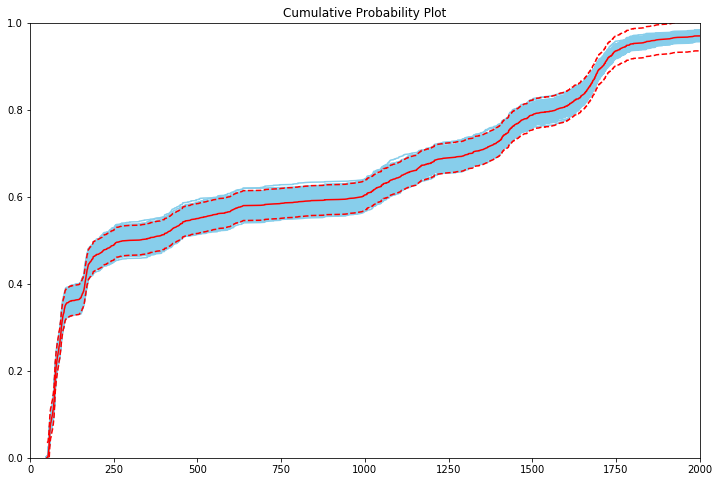

Elapsed Time = 10.303840398788452 seconds


In [12]:
start = time.time()

L = 1000
PPinterval = 1500
ppparents = np.zeros((L,PPinterval))
ppdraws = np.zeros((L,PPinterval))
reali_ages = np.zeros((L, df2.BestAge.count()))
ppr_values = np.zeros((L))
Dmaxes = np.zeros((L))

df2 = df.loc[sampleList]
ecdf = ECDF(df2.BestAge)

#KDE_age = np.arange(0, 4501, 1)
#bw=8

#KDE = np.zeros(shape=(len(df2.BestAge),len(KDE_age)))
#kde = KDEUnivariate(df2.BestAge)
#kde.fit(bw=bw)
#kde = kde.evaluate(KDE_age)

pyplot.figure(1, figsize=(12,8))
#pyplot.figure(2, figsize=(12,4))

for i in range(0, L):
    ppparents[i] = ecdf([np.linspace(0, 3000, PPinterval)]) #600)])
    reali = df2.sample(replace=True, n=df2.BestAge.count())
    ecdfi = ECDF(reali.BestAge)
    reali_ages[i] = reali.BestAge
    ppdraws[i] = ecdfi([np.linspace(0, 3000, PPinterval)]) #600)])
    ppslopes, ppintercepts, ppr_values[i], ppp_values, ppstd_errs = st.linregress(ppparents[i],ppdraws[i])
    Dmaxes[i] = np.max(np.abs(ppparents[i]-ppdraws[i]))
    
    pyplot.figure(1)
    pyplot.plot(ecdfi.x, ecdfi.y, 'skyblue')
    
    #KDEreali = np.zeros(shape=(len(reali.BestAge),len(KDE_age)))
    #kdereali = KDEUnivariate(reali.BestAge)
    #kdereali.fit(bw=bw)
    #kdereali = kdereali.evaluate(KDE_age)
    
    #pyplot.figure(2)
    #pyplot.plot(KDE_age, kdereali, color = 'skyblue')
    

pyplot.figure(1)
pyplot.plot(ecdf.x, ecdf.y, 'red')
pyplot.plot(ecdf.x, ecdf.y+delta, 'red', linestyle='dashed')
pyplot.plot(ecdf.x, ecdf.y-delta, 'red', linestyle='dashed')
pyplot.axis([0, 2000, 0, 1])
pyplot.title("Cumulative Probability Plot")

#pyplot.figure(2)
#pyplot.plot(KDE_age, kde, color='red')
#pyplot.xlim(0, 2000)

print('Sample size =', df2.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta)
pyplot.show()

elapsed_time = (time.time()-start)
print('Elapsed Time =', elapsed_time, 'seconds')

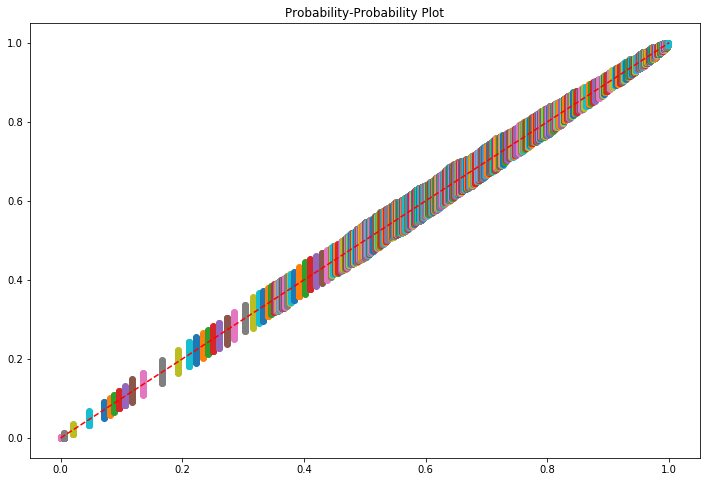

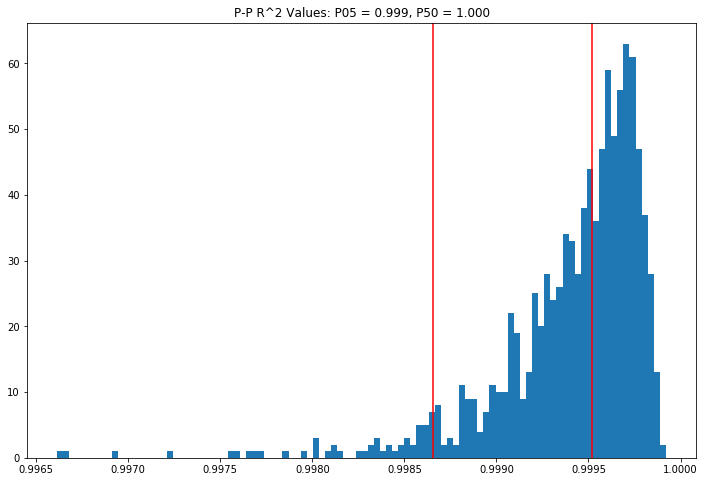

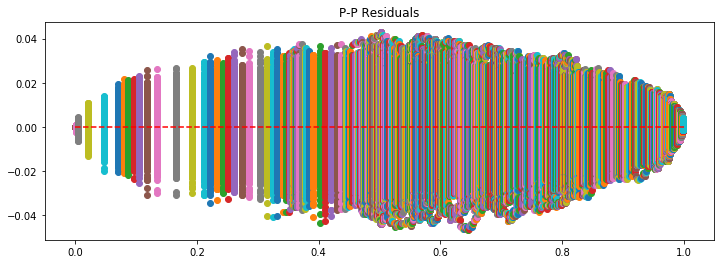

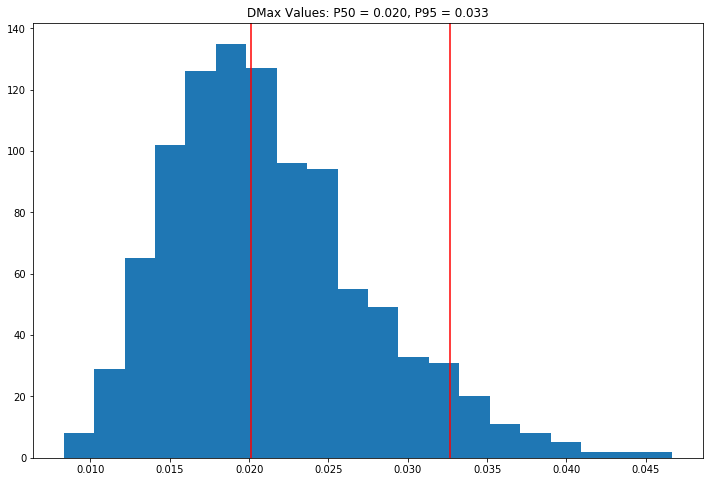

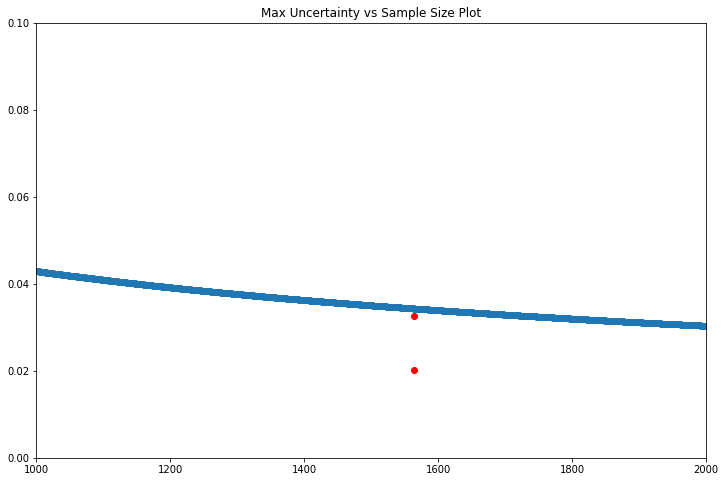

Elapsed Time = 23.765541315078735 seconds


In [13]:
start = time.time()

ppresiduals = ppparents - ppdraws

ppP05, ppP50 = np.percentile(ppr_values**2,[5, 50])
dmaxP50, dmaxP95 = np.percentile(Dmaxes,[50,95])

#pp_x = np.linspace(min(ppr_values**2), max(ppr_values**2), 1000)
#ppshape, pploc, ppscale = st.lognorm.fit(ppr_values**2)
#pp_pdf = st.lognorm.pdf(pp_x, ppshape, pploc, ppscale)

pyplot.figure(1, figsize=(12,8))
pyplot.figure(2, figsize=(12,8))
pyplot.figure(3, figsize=(12,4))
pyplot.figure(4, figsize=(12,8))
pyplot.figure(5, figsize=(12,8))

pyplot.figure(1)
pyplot.plot(ppparents, ppdraws, marker = 'o', linestyle = '')
pyplot.plot([0,1],[0,1], 'red', linestyle = 'dashed')
pyplot.title("Probability-Probability Plot")

pyplot.figure(2)
pyplot.hist(ppr_values**2, 100)
#pyplot.plot(pp_x, pp_pdf, 'red')
pyplot.axvline(x=ppP05, color = 'red')
pyplot.axvline(x=ppP50, color = 'red')
pyplot.title("P-P R^2 Values: P05 = %0.3f, P50 = %0.3f" % (ppP05, ppP50))

pyplot.figure(3)
pyplot.plot(ppparents, ppresiduals, marker = 'o', linestyle = '')
pyplot.plot([0,1],[0,0], 'red', linestyle = 'dashed')
pyplot.title("P-P Residuals")

pyplot.figure(4)
pyplot.hist(Dmaxes, 20)
pyplot.axvline(x=dmaxP50, color = 'red')
pyplot.axvline(x=dmaxP95, color = 'red')
pyplot.title("DMax Values: P50 = %0.3f, P95 = %0.3f" % (dmaxP50, dmaxP95))

pyplot.figure(5)
pyplot.plot(xdiff, deltas, marker = 'o', linestyle = '')
pyplot.plot(df2.BestAge.count(), dmaxP50, marker = 'o', color = 'red')
pyplot.plot(df2.BestAge.count(), dmaxP95, marker = 'o', color = 'red')
#pyplot.axis([-50, 3050, 0, 1])
#pyplot.axis([-50, 300, 0, 0.2])
pyplot.axis([1000, 2000, 0, 0.1])
pyplot.title("Max Uncertainty vs Sample Size Plot")

pyplot.show()

elapsed_time = (time.time()-start)
print('Elapsed Time =', elapsed_time, 'seconds')

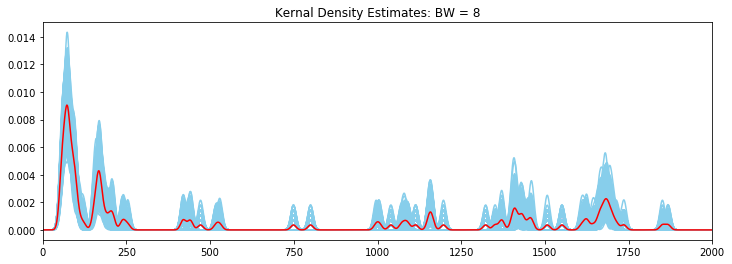

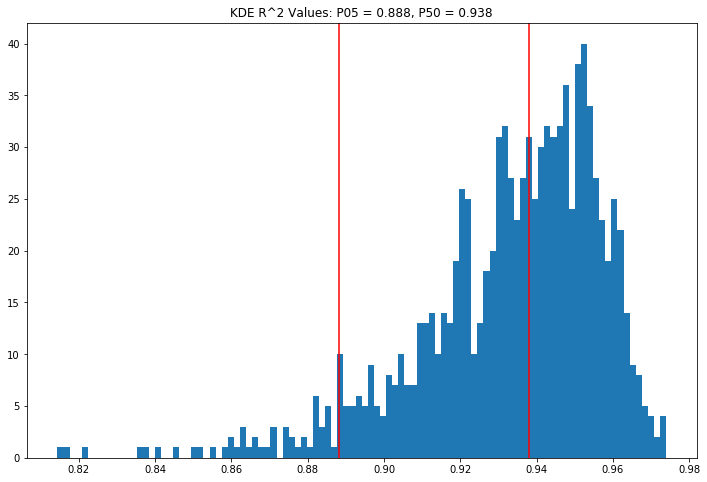

Elapsed Time = 72.30701565742493 seconds


In [9]:
start = time.time()

bw=8
KDE_age = np.arange(0, 4501, 1)

KDE = np.zeros(shape=(len(df2.BestAge),len(KDE_age)))
kde = KDEUnivariate(df2.BestAge)
kde.fit(bw=bw)
kde = kde.evaluate(KDE_age)

kde_r_values = []

pyplot.figure(1, figsize=(12,4))
pyplot.figure(2, figsize=(12,8))

pyplot.figure(1)

for row in reali_ages:
    KDEreali = np.zeros(shape=(len(row),len(KDE_age)))
    kdereali = KDEUnivariate(row)
    kdereali.fit(bw=bw)
    kdereali = kdereali.evaluate(KDE_age)
    kde_slopei, kde_intercepti, kde_r_valuei, kde_p_valuei, kde_std_erri = st.linregress(kde,kdereali)
    kde_r_values.append(kde_r_valuei)
    pyplot.plot(KDE_age, kdereali, color = 'skyblue')

kde_r_values_ar = np.asarray(kde_r_values)
kde_r_P05, kde_r_P50 = np.percentile(kde_r_values_ar**2,[5, 50])

#kde_x = np.linspace(min(kde_r_values_ar**2), max(kde_r_values_ar**2), 1000)
#kdeshape, kdeloc, kdescale = st.lognorm.fit(kde_r_values_ar**2)
#kde_pdf = st.lognorm.pdf(kde_x, kdeshape, kdeloc, kdescale)

pyplot.plot(KDE_age, kde, color='red')
pyplot.xlim(0, 2000)
#pyplot.xlim(0, 300)
pyplot.title("Kernal Density Estimates: BW = %0.0f" % (bw))

pyplot.figure(2)
pyplot.hist(kde_r_values_ar**2, 100)
#pyplot.plot(kde_x, kde_pdf, 'red')
pyplot.axvline(x=kde_r_P05, color = 'red')
pyplot.axvline(x=kde_r_P50, color = 'red')
pyplot.title("KDE R^2 Values: P05 = %0.3f, P50 = %0.3f" % (kde_r_P05, kde_r_P50))

pyplot.show()

elapsed_time = (time.time()-start)
print('Elapsed Time =', elapsed_time, 'seconds')

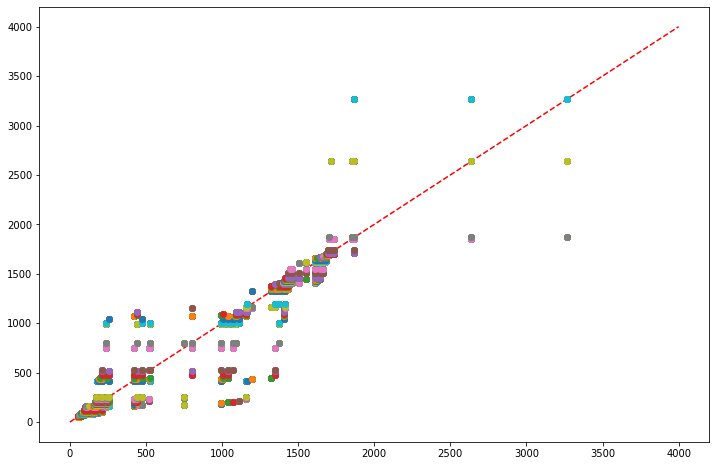

In [77]:
#Q-Q Plot attempt

df2 = df.loc[sampleList]

L = 10
parent = np.zeros((L,df2.BestAge.count()))
draw = np.zeros((L,df2.BestAge.count()))

for i in range(0, L):
    parent[i] = df2.BestAge
    reali = df2.sample(replace=True, n=df2.BestAge.count())
    draw[i] = reali.BestAge
    parent.sort()
    draw.sort()

#residual = parent-draw
#residual
#draw
#parent
#np.shape(parent)
#np.shape(draw)

pyplot.figure(1, figsize=(12,8))

pyplot.plot([0,4000],[0,4000], 'red', linestyle = 'dashed')
pyplot.plot(draw, parent, marker = 'o', linestyle = '')
pyplot.show()

In [78]:
#P-P plot attempt

df2 = df.loc[sampleList]

pyplot.figure(1, figsize=(12,8))


# np.percentiles actually gives me quantiles, possibly useful for a Q-Q plot
#pP10, pP20, pP30, pP40, pP50, pP60, pP70, pP80, pP90 = np.percentile(df2.BestAge,[10, 20, 30, 40, 50, 60, 70, 80, 90])

#pP10, pP20, pP30, pP40, pP50, pP60, pP70, pP80, pP90

#reali = df2.sample(replace=True, n=df2.BestAge.count())
#rP10, rP20, rP30, rP40, rP50, rP60, rP70, rP80, rP90 = np.percentile(reali.BestAge,[10, 20, 30, 40, 50, 60, 70, 80, 90])

#rP10, rP20, rP30, rP40, rP50, rP60, rP70, rP80, rP90

#Ok using ecdf to get cumulative probability values for ages - this will get me the P-P plot
ecdf = ECDF(df2.BestAge)
p100, p200, p300, p400, p500, p600, p700, p800, p900, p1000 = ecdf([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

reali = df2.sample(replace=True, n=df2.BestAge.count())
ecdfi = ECDF(reali.BestAge)
r100, r200, r300, r400, r500, r600, r700, r800, r900, r1000 = ecdfi([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])


#print(pP10, pP20, pP30, pP40, pP50, pP60, pP70, pP80, pP90)
#print(rP10, rP20, rP30, rP40, rP50, rP60, rP70, rP80, rP90)
print(p100, p200, p300, p400, p500, p600, p700, p800, p900, p1000)
print(r100, r200, r300, r400, r500, r600, r700, r800, r900, r1000)

#pyplot.show()

0.3525179856115108 0.5179856115107914 0.5611510791366906 0.5611510791366906 0.5971223021582733 0.6115107913669064 0.6115107913669064 0.6258992805755396 0.6258992805755396 0.6330935251798561
0.36690647482014394 0.539568345323741 0.5755395683453237 0.5755395683453237 0.6187050359712231 0.6258992805755396 0.6258992805755396 0.6258992805755396 0.6258992805755396 0.6474820143884892


<Figure size 864x576 with 0 Axes>

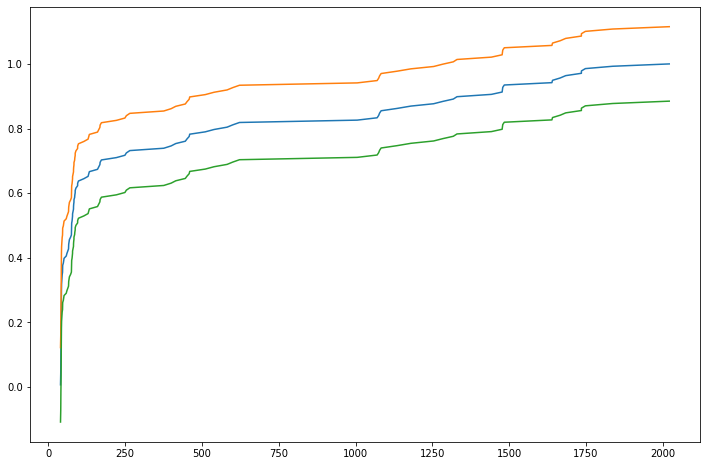

Sample size = 138
95% Confidence Interval = ± 0.11519266710327822


In [8]:
#creates new dataframe based purely on the samples you want to subsample/downsample
df3 = df.loc[sampleList2]
ecdf2 = ECDF(df3.BestAge)

confidence2 = 0.95
alpha2 = 1-confidence2
delta2 = math.sqrt((1/(2*(df3.BestAge.count()+1)))*math.log(2/alpha2))
#delta

pyplot.figure(1, figsize=(12,8))

pyplot.plot(ecdf2.x, ecdf2.y)
pyplot.plot(ecdf2.x, ecdf2.y+delta2)
pyplot.plot(ecdf2.x, ecdf2.y-delta2)
pyplot.show()

print('Sample size =', df3.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta2)


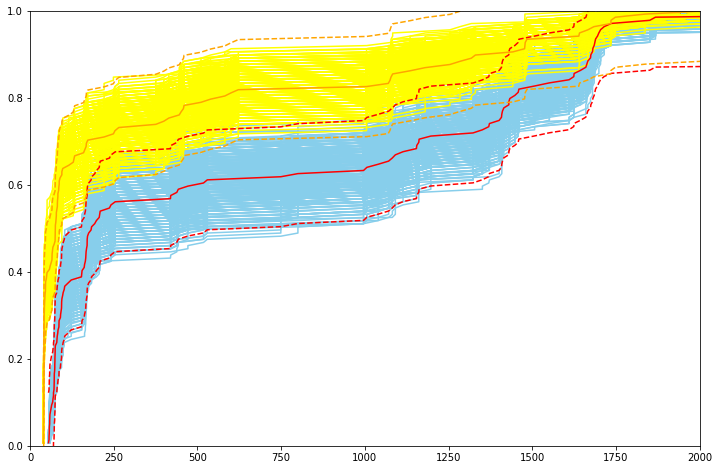

Sample size = 139
95% Confidence Interval = ± 0.11478052743814318
Sample size = 138
95% Confidence Interval = ± 0.11519266710327822


In [9]:
df2 = df.loc[sampleList]
df3 = df.loc[sampleList2]

pyplot.figure(1, figsize=(12,8))

L = 1000

for i in range(0, L):
    reali = df2.sample(replace=True, n=df2.BestAge.count())
    ecdfi = ECDF(reali.BestAge)
    pyplot.plot(ecdfi.x, ecdfi.y, 'skyblue')

for l in range(0, L):
    reall = df3.sample(replace=True, n=df3.BestAge.count())
    ecdfl = ECDF(reall.BestAge)
    pyplot.plot(ecdfl.x, ecdfl.y, 'yellow')

pyplot.plot(ecdf.x, ecdf.y, 'red')
pyplot.plot(ecdf.x, ecdf.y+delta, 'red', linestyle='dashed')
pyplot.plot(ecdf.x, ecdf.y-delta, 'red', linestyle='dashed')

pyplot.plot(ecdf2.x, ecdf2.y, 'orange')
pyplot.plot(ecdf2.x, ecdf2.y+delta2, 'orange', linestyle='dashed')
pyplot.plot(ecdf2.x, ecdf2.y-delta2, 'orange', linestyle='dashed')
pyplot.axis([0, 2000, 0, 1])

pyplot.show()

print('Sample size =', df2.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta)

print('Sample size =', df3.BestAge.count())
print('95% Confidence Interval =', '\u00B1', delta2)